(353, 10) (353,)
(89, 10) (89,)
Iteration 100 : Loss 4003.0637
Iteration 200 : Loss 3441.4487
Iteration 300 : Loss 3213.7057
Iteration 400 : Loss 3093.4588
Iteration 500 : Loss 3022.4810
Iteration 600 : Loss 2978.7493
Iteration 700 : Loss 2951.2194
Iteration 800 : Loss 2933.6100
Iteration 900 : Loss 2922.1759
Iteration 1000 : Loss 2914.6371
Iteration 1100 : Loss 2909.5862
Iteration 1200 : Loss 2906.1445
Iteration 1300 : Loss 2903.7570
Iteration 1400 : Loss 2902.0692
Iteration 1500 : Loss 2900.8519
Iteration 1600 : Loss 2899.9548
Iteration 1700 : Loss 2899.2787
Iteration 1800 : Loss 2898.7568
Iteration 1900 : Loss 2898.3439
Iteration 2000 : Loss 2898.0087
Iteration 2100 : Loss 2897.7297
Iteration 2200 : Loss 2897.4916
Iteration 2300 : Loss 2897.2836
Iteration 2400 : Loss 2897.0980
Iteration 2500 : Loss 2896.9290
Iteration 2600 : Loss 2896.7727
Iteration 2700 : Loss 2896.6259
Iteration 2800 : Loss 2896.4865
Iteration 2900 : Loss 2896.3528
Iteration 3000 : Loss 2896.2235


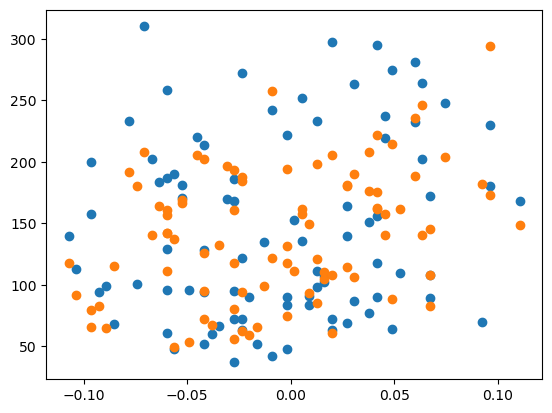

In [2]:
'''
Created on 2026. 1. 22.

@author: chaliepark
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import numpy as np


LEARNING_RATE = 0.5
data = load_diabetes()
df_X = data.data
df_y = data.target
X = np.array(df_X)
y = np.array(df_y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

#global W, b

losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

